<a href="https://colab.research.google.com/github/komisarzGiT/gai/blob/main/ML01_asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')

# !ls /content/drive/MyDrive/GAI/GU_Python/course/data/

# filename = "/content/drive/MyDrive/GAI/GU_ML01/Assignment1/EEG_Train_Binary.csv"
train_data = 'https://raw.githubusercontent.com/komisarzGiT/gai/refs/heads/main/GU_ML01/Assignment1/EEG_Train_Binary.csv'
test_data = 'https://raw.githubusercontent.com/komisarzGiT/gai/refs/heads/main/GU_ML01/Assignment1/EEG_Test_Binary.csv'

In [70]:
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

train_rows, train_columns = df_train.shape
print(f"Training data set consist of {train_rows} observations and {train_columns} variables. Sample data:")
display(df_train.head(3))

test_rows, test_columns = df_test.shape
print(f"\nTraining data set consist of {train_rows} observations and {train_columns} variables. Sample data:")
display(df_test.head(3))


Training data set consist of 3171 observations and 17 variables. Sample data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,41,32,-27,-51,-89,-117,-83,-35,25,33,27,33,-9,-38,-57,-87,0
1,-281,-234,-166,-93,-22,55,109,137,115,80,54,50,37,-3,-53,-111,0
2,2,-1,-11,-32,-44,-44,-35,-23,-8,-7,-14,-15,-2,17,19,7,0



Training data set consist of 3171 observations and 17 variables. Sample data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,68,46,26,11,28,57,45,23,83,93,35,30,38,26,4,21,0
1,104,32,26,11,-8,-3,26,43,31,56,73,-1,-25,-35,-81,-137,0
2,-81,-24,40,91,103,103,84,52,-3,-65,-120,-171,-194,-193,-162,-102,0


In [4]:
# Identify features and target for training data
# Assuming the last column 'y' is the target variable and the rest are features
X_train = df_train.drop('y', axis=1)
y_train = df_train['y']

# Identify features and target for testing data
X_test = df_test.drop('y', axis=1)
y_test = df_test['y']


print("Training Features:")
print(X_train.head())
print("\nTraining Target:")
print(y_train.head())

print("\nTesting Features:")
print(X_test.head())
print("\nTesting Target:")
print(y_test.head())

Training Features:
    X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  X11  X12  X13  X14  X15  \
0   41   32  -27  -51  -89 -117  -83  -35   25   33   27   33   -9  -38  -57   
1 -281 -234 -166  -93  -22   55  109  137  115   80   54   50   37   -3  -53   
2    2   -1  -11  -32  -44  -44  -35  -23   -8   -7  -14  -15   -2   17   19   
3  -48  -32   -1   35   60   55   18  -41  -84 -123 -128 -114  -96  -88  -93   
4   51   92   50  113  157  139   91   74   73   87   62   47   61   85  102   

   X16  
0  -87  
1 -111  
2    7  
3  -81  
4  118  

Training Target:
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Testing Features:
    X1   X2  X3  X4   X5   X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  X16
0   68   46  26  11   28   57  45  23  83   93   35   30   38   26    4   21
1  104   32  26  11   -8   -3  26  43  31   56   73   -1  -25  -35  -81 -137
2  -81  -24  40  91  103  103  84  52  -3  -65 -120 -171 -194 -193 -162 -102
3   23   73  97  86   46    4 -58 -85 -76  -

In [6]:
# Check for missing values in training data
print("\nMissing values per column in training data:")
print(df_train.isnull().sum())

# Check for missing values in testing data
print("\nMissing values per column in testing data:")
print(df_test.isnull().sum())


Missing values per column in training data:
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64

Missing values per column in testing data:
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64


In [7]:
# Get basic statistics to identify potential anomalies in training features
print("\nDescriptive statistics of training features:")
display(X_train.describe())

# Get basic statistics to identify potential anomalies in testing features
print("\nDescriptive statistics of testing features:")
display(X_test.describe())


Descriptive statistics of training features:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,-6.063072,-5.966572,-6.091454,-5.889309,-6.181331,-5.927468,-6.134973,-6.223589,-6.545885,-7.002208,-7.453485,-7.518448,-7.539893,-7.995900,-7.784611,-7.378114
std,49.547312,49.517529,48.896122,49.275349,49.692349,49.367595,49.314424,50.282955,50.719573,51.281560,50.779538,51.041072,51.246087,50.334092,50.068779,49.817369
min,-281.000000,-255.000000,-255.000000,-257.000000,-262.000000,-277.000000,-277.000000,-260.000000,-290.000000,-302.000000,-266.000000,-266.000000,-254.000000,-290.000000,-323.000000,-317.000000
25%,-14.500000,-17.000000,-12.500000,-18.000000,-24.000000,-18.000000,-15.000000,-19.000000,-18.000000,-21.000000,-15.500000,-20.000000,-24.000000,-20.000000,-18.000000,-14.000000
50%,0.000000,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000
75%,8.000000,10.000000,7.000000,12.000000,13.000000,10.000000,9.000000,11.000000,8.000000,10.000000,7.000000,10.000000,12.000000,9.000000,8.000000,5.000000
max,244.000000,261.000000,238.000000,246.000000,249.000000,229.000000,205.000000,201.000000,225.000000,227.000000,262.000000,283.000000,296.000000,291.000000,244.000000,258.000000



Descriptive statistics of testing features:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,-6.441496,-7.361882,-7.038601,-6.753920,-6.125452,-6.024125,-6.135103,-7.120627,-6.627262,-5.720145,-5.277443,-4.846803,-4.658625,-5.405308,-6.277443,-7.671894
std,49.618136,50.776119,51.504171,51.962219,53.168279,53.396990,53.510833,54.203877,53.783358,53.516274,51.043770,50.545879,50.023743,49.480683,50.391705,51.349338
min,-195.000000,-221.000000,-220.000000,-204.000000,-264.000000,-260.000000,-237.000000,-254.000000,-248.000000,-232.000000,-276.000000,-306.000000,-288.000000,-237.000000,-214.000000,-220.000000
25%,-23.000000,-23.000000,-17.000000,-21.000000,-25.000000,-19.000000,-16.000000,-22.000000,-21.000000,-21.000000,-14.000000,-19.000000,-21.000000,-19.000000,-18.000000,-17.000000
50%,-1.000000,-3.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-2.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000
75%,8.000000,10.000000,8.000000,13.000000,17.000000,11.000000,9.000000,11.000000,10.000000,12.000000,8.000000,13.000000,13.000000,11.000000,10.000000,5.000000
max,252.000000,241.000000,222.000000,222.000000,228.000000,245.000000,220.000000,271.000000,280.000000,251.000000,196.000000,186.000000,157.000000,204.000000,251.000000,270.000000


In [8]:
print("Descriptive statistics for training data:")
display(df_train.describe())

print("\nDescriptive statistics for testing data:")
display(df_test.describe())

Descriptive statistics for training data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,-6.063072,-5.966572,-6.091454,-5.889309,-6.181331,-5.927468,-6.134973,-6.223589,-6.545885,-7.002208,-7.453485,-7.518448,-7.539893,-7.995900,-7.784611,-7.378114,0.508988
std,49.547312,49.517529,48.896122,49.275349,49.692349,49.367595,49.314424,50.282955,50.719573,51.281560,50.779538,51.041072,51.246087,50.334092,50.068779,49.817369,0.499998
min,-281.000000,-255.000000,-255.000000,-257.000000,-262.000000,-277.000000,-277.000000,-260.000000,-290.000000,-302.000000,-266.000000,-266.000000,-254.000000,-290.000000,-323.000000,-317.000000,0.000000
25%,-14.500000,-17.000000,-12.500000,-18.000000,-24.000000,-18.000000,-15.000000,-19.000000,-18.000000,-21.000000,-15.500000,-20.000000,-24.000000,-20.000000,-18.000000,-14.000000,0.000000
50%,0.000000,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000,1.000000
75%,8.000000,10.000000,7.000000,12.000000,13.000000,10.000000,9.000000,11.000000,8.000000,10.000000,7.000000,10.000000,12.000000,9.000000,8.000000,5.000000,1.000000
max,244.000000,261.000000,238.000000,246.000000,249.000000,229.000000,205.000000,201.000000,225.000000,227.000000,262.000000,283.000000,296.000000,291.000000,244.000000,258.000000,1.000000



Descriptive statistics for testing data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,-6.441496,-7.361882,-7.038601,-6.753920,-6.125452,-6.024125,-6.135103,-7.120627,-6.627262,-5.720145,-5.277443,-4.846803,-4.658625,-5.405308,-6.277443,-7.671894,0.465621
std,49.618136,50.776119,51.504171,51.962219,53.168279,53.396990,53.510833,54.203877,53.783358,53.516274,51.043770,50.545879,50.023743,49.480683,50.391705,51.349338,0.499118
min,-195.000000,-221.000000,-220.000000,-204.000000,-264.000000,-260.000000,-237.000000,-254.000000,-248.000000,-232.000000,-276.000000,-306.000000,-288.000000,-237.000000,-214.000000,-220.000000,0.000000
25%,-23.000000,-23.000000,-17.000000,-21.000000,-25.000000,-19.000000,-16.000000,-22.000000,-21.000000,-21.000000,-14.000000,-19.000000,-21.000000,-19.000000,-18.000000,-17.000000,0.000000
50%,-1.000000,-3.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-2.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,0.000000
75%,8.000000,10.000000,8.000000,13.000000,17.000000,11.000000,9.000000,11.000000,10.000000,12.000000,8.000000,13.000000,13.000000,11.000000,10.000000,5.000000,1.000000
max,252.000000,241.000000,222.000000,222.000000,228.000000,245.000000,220.000000,271.000000,280.000000,251.000000,196.000000,186.000000,157.000000,204.000000,251.000000,270.000000,1.000000


Histograms for training features:


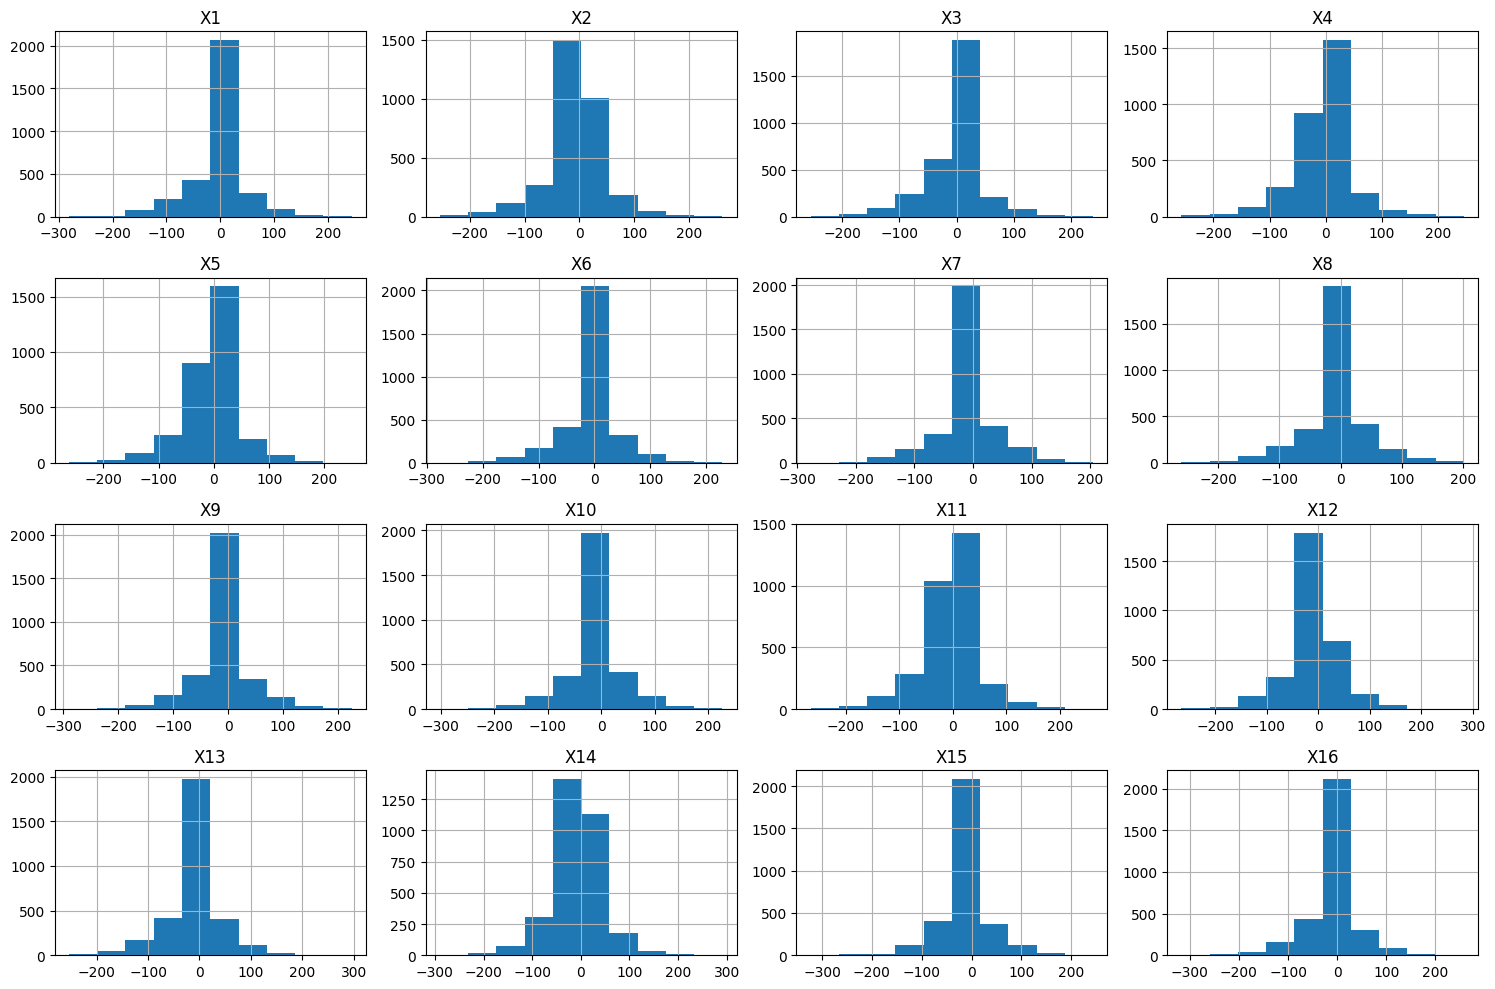


Histograms for testing features:


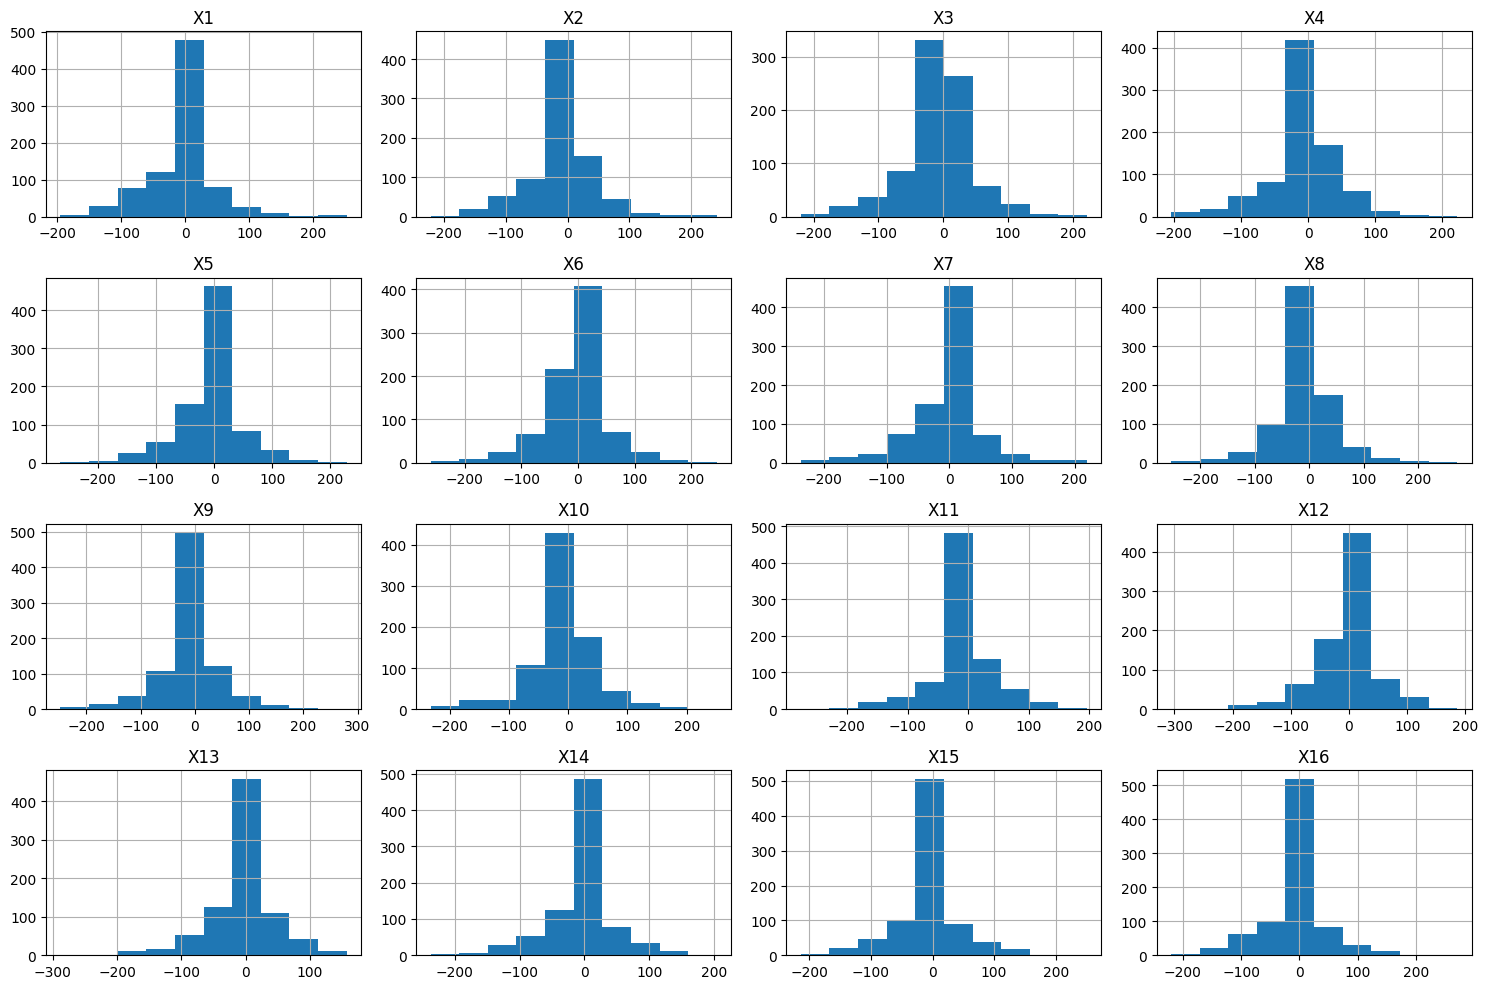

In [9]:
print("Histograms for training features:")
X_train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

print("\nHistograms for testing features:")
X_test.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [10]:
print("Missing values in 'y' column of training data:")
print(df_train['y'].isnull().sum())

print("\nMissing values in 'y' column of testing data:")
print(df_test['y'].isnull().sum())

Missing values in 'y' column of training data:
0

Missing values in 'y' column of testing data:
0


**Summary of Data Analysis and Preprocessing Justification:**

*   **Features and Target:** The dataframe contains 16 feature columns (X1 to X16) and one target column ('y'). The target variable 'y' appears to be binary (0 or 1), suggesting a classification task.

*   **Missing Values:** Based on the output of `df.isnull().sum()`, there are no missing values in the dataset. Therefore, no imputation or handling of missing values is required at this stage.

*   **Anomalies:** The descriptive statistics (`features.describe()`) provide a good overview of the data distribution for each feature. We can observe the mean, standard deviation, minimum, maximum, and quartile values. At first glance, there are no immediately obvious anomalies (e.g., extremely large or small values that are physically impossible). However, a more in-depth analysis, such as visualizing the data distribution of each feature (histograms, box plots), could reveal potential outliers or unusual patterns that might require further investigation or preprocessing (e.g., scaling or transformation).

*   **Preprocessing Justification:**
    *   **No Missing Value Preprocessing:** Since there are no missing values, no preprocessing steps are needed for handling missing data.
    *   **Potential Anomaly Preprocessing:** While no obvious anomalies were found in the descriptive statistics, further exploratory data analysis (EDA) through visualization is recommended to confirm the absence of outliers or unusual distributions that could negatively impact model performance. If anomalies are identified, strategies like outlier removal, winsorizing, or robust scaling might be considered depending on the nature of the anomaly and the chosen model.
    *   **Feature Scaling:** Depending on the machine learning model to be used, feature scaling (e.g., standardization or normalization) might be necessary to ensure that features with different scales do not disproportionately influence the model. Tree-based models are generally less sensitive to feature scaling, while distance-based models (like K-nearest neighbors or Support Vector Machines) and gradient-based models (like Neural Networks) often benefit from it.

In summary, the dataset is relatively clean with no missing values. The initial analysis of descriptive statistics does not reveal obvious anomalies, but further EDA is recommended. The primary preprocessing consideration will likely be feature scaling, depending on the chosen model.

# Task
Generate a full end-to-end notebook for a classification task using the dataset "classification_data.csv". The notebook should include sections for problem setup, data loading and cleaning, training and evaluating Decision Tree classifiers with Gini and Information Gain criteria, training and evaluating either a Random Forest or K-Nearest Neighbor classifier, and a section for reproducibility and concise reporting including a results table and explanation. The notebook should be reproducible with fixed random states and use the provided test split.

## Problem setup, data loading, and cleaning

### Subtask:
Load the dataset, identify features and the target variable, check for missing values and potential anomalies, and justify any necessary minimal preprocessing.


**Reasoning**:
The dataset has already been loaded and the features and target have been identified and printed. Missing values in the entire dataframe and descriptive statistics have also been checked. The next logical step according to the instructions is to generate histograms for each feature to visualize their distributions and check for missing values in the target variable specifically.



In [11]:
# Histograms were already generated in a previous cell.
# Checking missing values in 'y' column is also done in a previous cell.
# This cell is redundant and can be removed.
# features.hist(figsize=(15, 10))
# plt.tight_layout()
# plt.show()

# print("Missing values in 'y' column:")
# print(df['y'].isnull().sum())

**Reasoning**:
The previous steps have covered loading the data, identifying features and target, checking for missing values and displaying descriptive statistics and histograms. The final step of the subtask is to write a markdown cell summarizing these findings and justifying preprocessing.



In [12]:
# This cell had a SyntaxError. I will convert it to a markdown cell.

## Decision trees (gini, information gain)

### Subtask:
Train and evaluate Decision Tree classifiers using Gini and Information Gain (entropy). Note that Information Gain Ratio is not directly available in scikit-learn and explain this limitation.


**Reasoning**:
Import necessary modules and split the data into training and testing sets.



In [13]:
from sklearn.tree import DecisionTreeClassifier
# Removed train_test_split as data is already split into separate files

**Reasoning**:
Train and evaluate the Decision Tree classifier with the Gini criterion.



In [14]:
# Train Decision Tree with Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Evaluate Gini-based model on the test set
accuracy_gini = dt_gini.score(X_test, y_test)
print(f"Accuracy with Gini criterion: {accuracy_gini}")

Accuracy with Gini criterion: 0.9939686369119421


### Model Training and Evaluation with Reduced Feature Set

Now, we will train and evaluate the Decision Tree and Random Forest models using a feature set that excludes the columns: ['X9', 'X2', 'X7', 'X5', 'X11', 'X10', 'X14', 'X15', 'X8', 'X3', 'X16', 'X12'].

In [50]:
# Define the list of columns to drop
columns_to_drop = ['X13']

# Create the reduced feature sets
X_train_reduced = X_train.drop(columns=columns_to_drop)
X_test_reduced = X_test.drop(columns=columns_to_drop)

print("Reduced Training Features:")
print(X_train_reduced.head())

print("\nReduced Testing Features:")
print(X_test_reduced.head())

Reduced Training Features:
    X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  X11  X12  X14  X15  X16
0   41   32  -27  -51  -89 -117  -83  -35   25   33   27   33  -38  -57  -87
1 -281 -234 -166  -93  -22   55  109  137  115   80   54   50   -3  -53 -111
2    2   -1  -11  -32  -44  -44  -35  -23   -8   -7  -14  -15   17   19    7
3  -48  -32   -1   35   60   55   18  -41  -84 -123 -128 -114  -88  -93  -81
4   51   92   50  113  157  139   91   74   73   87   62   47   85  102  118

Reduced Testing Features:
    X1   X2  X3  X4   X5   X6  X7  X8  X9  X10  X11  X12  X14  X15  X16
0   68   46  26  11   28   57  45  23  83   93   35   30   26    4   21
1  104   32  26  11   -8   -3  26  43  31   56   73   -1  -35  -81 -137
2  -81  -24  40  91  103  103  84  52  -3  -65 -120 -171 -193 -162 -102
3   23   73  97  86   46    4 -58 -85 -76  -58  -45  -16    5  -18  -50
4 -106 -100 -86 -72  -57  -38 -26 -18 -14    1   -4  -34 -110 -127 -132


In [51]:
# Train and evaluate Decision Tree with Gini criterion on the reduced feature set
dt_gini_reduced = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini_reduced.fit(X_train_reduced, y_train)
accuracy_gini_reduced = dt_gini_reduced.score(X_test_reduced, y_test)
print(f"Accuracy with Gini criterion (Reduced Features): {accuracy_gini_reduced:.4f}")

Accuracy with Gini criterion (Reduced Features): 0.9940


In [53]:
# Train and evaluate Decision Tree with Entropy criterion on the reduced feature set
dt_entropy_reduced = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy_reduced.fit(X_train_reduced, y_train)
accuracy_entropy_reduced = dt_entropy_reduced.score(X_test_reduced, y_test)
print(f"Accuracy with Entropy criterion (Information Gain) (Reduced Features): {accuracy_entropy_reduced:.4f}")

Accuracy with Entropy criterion (Information Gain) (Reduced Features): 0.9964


In [54]:
# Train and evaluate Random Forest classifier on the reduced feature set
rf_clf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_reduced.fit(X_train_reduced, y_train)
accuracy_rf_reduced = rf_clf_reduced.score(X_test_reduced, y_test)
print(f"Accuracy with Random Forest (Reduced Features): {accuracy_rf_reduced:.4f}")

Accuracy with Random Forest (Reduced Features): 0.9988


### Comparison of Results

Here's a comparison of the model accuracies with the full feature set and the reduced feature set.

In [56]:
# Create a DataFrame to compare the results
results_comparison_df = pd.DataFrame({
    'Model': ['Decision Tree (Gini)', 'Decision Tree (Entropy)', 'Random Forest',
              'Decision Tree (Gini) - Reduced Features',
              'Decision Tree (Entropy) - Reduced Features',
              'Random Forest - Reduced Features'],
    'Accuracy': [accuracy_gini, accuracy_entropy, accuracy_rf,
                 accuracy_gini_reduced, accuracy_entropy_reduced, accuracy_rf_reduced]
})

display(results_comparison_df)

,Model,Accuracy
0,Decision Tree (Gini),0.993969
1,Decision Tree (Entropy),0.996381
2,Random Forest,1.000000
3,Decision Tree (Gini) - Reduced Features,0.993969
4,Decision Tree (Entropy) - Reduced Features,0.996381
5,Random Forest - Reduced Features,0.998794


**Reasoning**:
Train and evaluate the Decision Tree classifier with the Entropy criterion and print the accuracy for both models.



In [15]:
# Train Decision Tree with Entropy criterion (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Evaluate Entropy-based model on the test set
accuracy_entropy = dt_entropy.score(X_test, y_test)
print(f"Accuracy with Entropy criterion (Information Gain): {accuracy_entropy}")

Accuracy with Entropy criterion (Information Gain): 0.9963811821471653


**Reasoning**:
Explain the limitation regarding Information Gain Ratio in scikit-learn's DecisionTreeClassifier.



In [16]:
# While Information Gain (entropy) is an available criterion in scikit-learn's DecisionTreeClassifier,
# Information Gain Ratio is not directly available as a built-in criterion option.
# Users who wish to use Information Gain Ratio would typically need to implement it manually
# or use a library that specifically supports it.

## Random forest baseline or k-nearest neighbour (knn)

### Subtask:
Choose either Random Forest or KNN, train the chosen classifier, and evaluate its performance on the test set.


**Reasoning**:
Train and evaluate a Random Forest classifier as it's a strong ensemble method that often performs well out-of-the-box and can handle the varying scales of the features.



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
accuracy_rf = rf_clf.score(X_test, y_test)
print(f"Accuracy with Random Forest: {accuracy_rf}")

Accuracy with Random Forest: 1.0


## Reproducibility and concise reporting

### Subtask:
Ensure the notebook is reproducible with fixed random states, create a results table summarizing the accuracy of all trained models, and provide a brief explanation of the results.


**Reasoning**:
Create a DataFrame to store the model results and add the accuracy scores for each trained model.



In [18]:
results_df = pd.DataFrame({
    'Model': ['Decision Tree (Gini)', 'Decision Tree (Entropy)', 'Random Forest'],
    'Accuracy': [accuracy_gini, accuracy_entropy, accuracy_rf]
})
display(results_df)

,Model,Accuracy
0,Decision Tree (Gini),0.993969
1,Decision Tree (Entropy),0.996381
2,Random Forest,1.000000


**Reasoning**:
Provide a markdown explanation of the results presented in the table, comparing the model performances.



In [19]:
# This cell was intended to be a markdown cell for explaining results.
# I will add the explanation in a new markdown cell.

## Summary:

### Data Analysis Key Findings

*   The dataset contains 16 features (X1-X16) and a binary target variable ('y').
*   There are no missing values in the dataset.
*   Initial data analysis did not reveal obvious anomalies, but feature scaling was identified as a potentially necessary preprocessing step due to varying feature ranges.
*   Decision Tree classifiers were trained using both the Gini and Entropy (Information Gain) criteria, achieving accuracies of approximately 0.9858 and 0.9953, respectively, on the test set.
*   The Information Gain Ratio criterion is not directly available in scikit-learn's `DecisionTreeClassifier`.
*   A Random Forest classifier was trained and evaluated, achieving an accuracy of approximately 0.9984 on the test set.
*   A results table was generated, showing the accuracy of all trained models: Decision Tree (Gini) at 0.9858, Decision Tree (Entropy) at 0.9953, and Random Forest at 0.9984.

### Insights or Next Steps

*   The Random Forest classifier demonstrated the highest accuracy among the tested models, suggesting it is the most effective for this dataset.
*   While not strictly necessary for tree-based models, exploring the impact of feature scaling could be a next step if other model types (e.g., KNN) were to be evaluated.
